# Aprendizagem Automática - *Machine Learning*
## Projeto TEI  
### Trabalho realizado por: 
- João Portelinha, 20481 
- Luís Silva, 19314 
- Miguel Moio, 21460

## ***Machine Learning* e as suas Áreas**

***Machine Learning*** ou **Aprendizagem automática** é uma área da **Inteligência Artificial** que tem como foco no desenvolvimento de algoritmos e treino de modelos computacionais para que estes consigam "aprender" a partir de dados com o objetivo de realizar previsões, tomar decisões acertadas ou reconhecer padrões.

O ***Machine Learning*** é amplamente utilizado atualmente em várias áreas, sendo as mais comuns as seguintes:

- **Finanças**: É usado para prever valores de ações, detetar fraudes, analises de riscos de créditos e previsões/deteção de padrões no mercado;
- **Saúde**: É usado para análise de dados médicos, diagnóstico médico, monitoramento de pacientes e previsão de doenças.
- **Transportes**: É usado para otimização de rotas de transporte, previsão de atrasos, gestão de frotas e deteção de falhas em veículos.
- **Educação**: É usado para personalização de aprendizagem, análise de dados de desempenho, deteção de plágio e deteção de tendências de aprendizagem.

Em grupo escolhemos a área da Saúde para analisar a aplicação específica destes algoritmos e modelos, sendo que esta foi também falada em aula.

Uma das aplicações de ML nesta área é o diagnóstico assistido por computador (ML), que utiliza algoritmos *Machine Learning* para analisar imagens médicas e ajudar no diagnóstico de doenças.

Os diagnósticos assistidos por computador são particularmente úteis na deteção do cancro da mama, onde a precisão do diagnóstico é crucial para garantir que os pacientes recebam o tratamento adequado. Com estes diagnósticos, os médicos podem analisar imagens de mamografia e identificar com mais precisão áreas suspeitas, o que pode levar a um diagnóstico mais precoce e preciso. Este tipo de diagnósticos é aplicado em várias doenças ou condições, e ajuda também na toma de decisões sobre o melhor tratamento possível. No entanto, é importante ter em mente que a aplicação de Machine Learning na área de saúde requer uma análise cuidadosa dos dados e uma consideração cuidadosa da ética e privacidade dos pacientes.

## 2. ***Machine Learning* na análise a Diamantes**



### 2.1 Algoritmo - *DecisionTree*

Para construir o sistema de classificação foram usadas funcionalidades do pacote de aprendizagem automática scikit-learn. Este pacote foi lançado em 2017 e tem suporte nas linguagens Python, C e C++. Vários tipos de algoritmos de classificação e regressão estão contidos neste pacote.

Após alguma pesquisa e alguns testes com outros algoritmos de classificação disponibilizados pelo pacote scikit-learn (ex.: KNeighborsClassifier,RandomForestClassifier, Gradient Bosting Classifier) chegámos á conclusão que conseguiríamos obter melhores resultados utilizando o algoritmo DecisionTree.

O algoritmo DecisionTree pertence á família dos algoritmos Supervisionados. Este algoritmo pode ser utilizado tanto em problemas de classificação como em problemas de regressão.

O objetivo deste algoritmo é criar um modelo que prevê um valor para uma determinada variável, e utiliza para isso uma representação em árvore (daí o nome DecisionTree) na qual cada nó folha representa uma classe e os atributos são representados pelos nós interiores.

O algoritmo decide onde fazer as divisões de dados na árvore através de um determinado valor de Entropia, que varia entre 0 e 1 e é calculado utilizando a seguinte formula: 

\begin{equation}
\text{Valor de Entropia} = -{P(A)}*\text{log(P(A))} - {P(B)}*\text{log(P(B)}, \text{sendo P(A) a probabilidade de eventos negativos},
\text{P(B) a probabilidade de eventos positivos}
\end{equation}

### 2.2 - Conjunto de Dados Utilizado

De modo a ser possível implementar este classificador, foi utilizado o *dataset* *Heart Attack Analysis & Prediction Dataset*, que está disponível através do seguinte link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

Este *dataset* possui vários dados relativos a pessoas, que tenham doenças cardíacas e que possam vir um ataque cardíaco.

O *dataset* encontra-se organizado de forma simples, estando todos os dados armazenados apenas numa tabela num ficheiro do tipo *.csv*.

### 2.3 - Implementação do Classificador

De modo a treinar e testar o classificador é necessário realizar a leitura dos dados presentes no *Dataset*. Para isso utilizamos o pacote *pandas* que facilita bastante esse processo.

Começámos então por ler os dados e analisar o *dataset*.

In [60]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix

In [61]:
df = pd.read_csv("heart.csv", index_col=False)

df.shape

(303, 14)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


De forma a que se possa perceber melhor este problema, apresentamos as legendas sobre cada coluna:

- Age : Idade do paciente
- Sex : Sexo do paciente
- exang: Angina induzida por exercício (1 = yes; 0 = no)
- caa: Anomalias nas artérias coronárias (0-3)
- cp : Tipo de dor no peito
    * Valor 1: Angina típica
    * Valor 2: Angina atípica
    * Valor 3: Dor não-anginosa
    * Valor 4: Assintomático
- trtbps : Pressão arterial em repouso (em mm Hg)
- chol : Colesterol em mg/dl obtido através de sensor BMI
- fbs : (Açucar no sangue em jejum > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : Resultados de eletrocardiograma em repouso
    * Valor 0: Normal
    * Valor 1: Anormalidade da onda ST-T (Inversões da onda T e/ou elevação ou depressão do segmento ST > 0.05 mV)
    * Valor 2: Mostra hipertrofia do ventriculo esquerdo, provável ou definitiva através do criterio de Estes
- thalach : Batimentos cardiacos máximos alcançados
- target : 0= menos chance de ataque cardíaco | 1= maior chance de ataque cardíaco

In [63]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [64]:
dict = {}

for i in list(df.columns):
    dict[i] = df[i].value_counts().shape[0]

pd.DataFrame(dict, index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


### Separação das colunas em categorias e contínuas

In [65]:
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("As colunas de categoria são: ", cat_cols)
print("As colunas contínuas são: ", con_cols)
print("A varíavel 'target' é:  ", target_col)

As colunas de categoria são:  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
As colunas contínuas são:  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
A varíavel 'target' é:   ['output']


In [66]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Verificação da existência de algum valor nulo nos dados.

In [67]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [68]:
X = df.drop(['output'], axis = 1).values
y = df['output'].values

In [69]:
y[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## **Gráficos**

### Contagem do número de *targets*

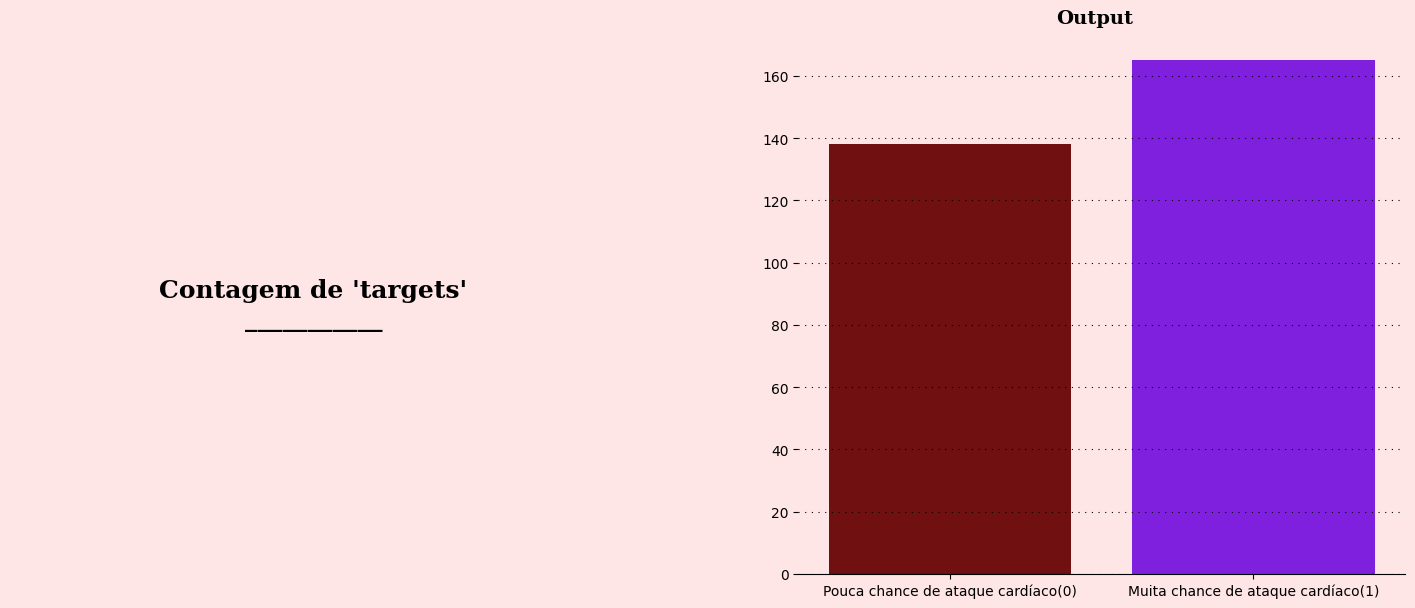

In [70]:
fig = plt.figure(figsize=(18,7))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 

# Title of the plot
ax0.text(0.5,0.5,"Contagem de 'targets'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')

ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Target Count
ax1.text(0.35,177,"Output",fontsize=14, fontweight='bold', fontfamily='serif', color="#000000")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1, data=df, x = 'output',palette = color_palette)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.set_xticklabels(["Pouca chance de ataque cardíaco(0)","Muita chance de ataque cardíaco(1)"])

ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)

### Matriz de correlação de *features* contínuas

In [71]:
df_corr = df[con_cols].corr().transpose()
df_corr

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


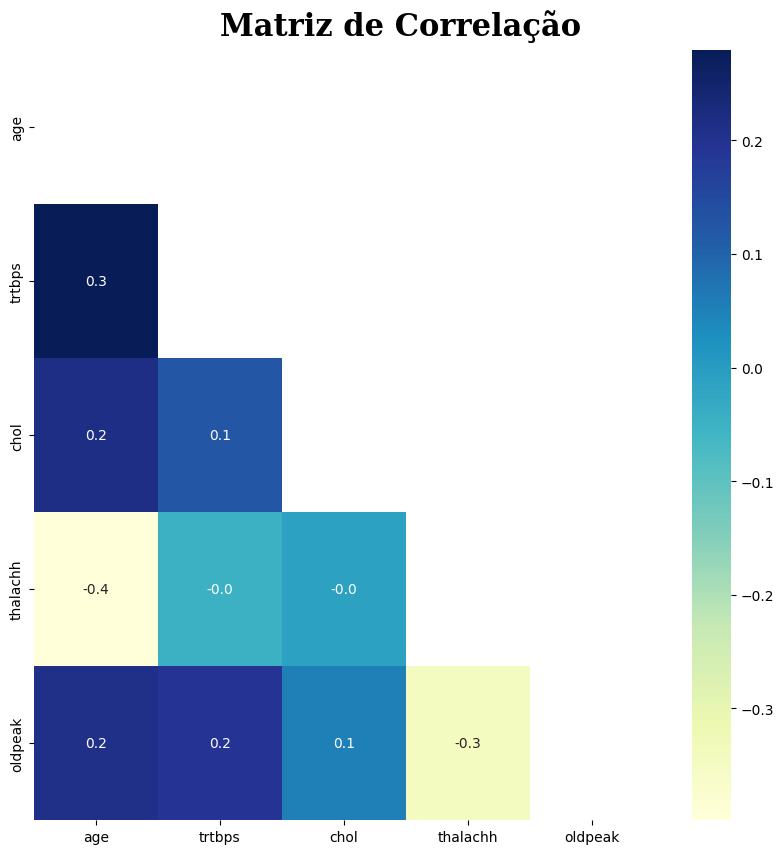

In [72]:
fig = plt.figure(figsize=(10,10))
gs = fig.add_gridspec(1,1)
gs.update(wspace=0.3, hspace=0.15)
ax0 = fig.add_subplot(gs[0,0])

mask = np.triu(np.ones_like(df_corr))
ax0.text(1.5,-0.1,"Matriz de Correlação",fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
df_corr = df[con_cols].corr().transpose()
sns.heatmap(df_corr,mask=mask,fmt=".1f",annot=True,cmap='YlGnBu')
plt.show()

### Distribuição das contínuas em relação ao *target*

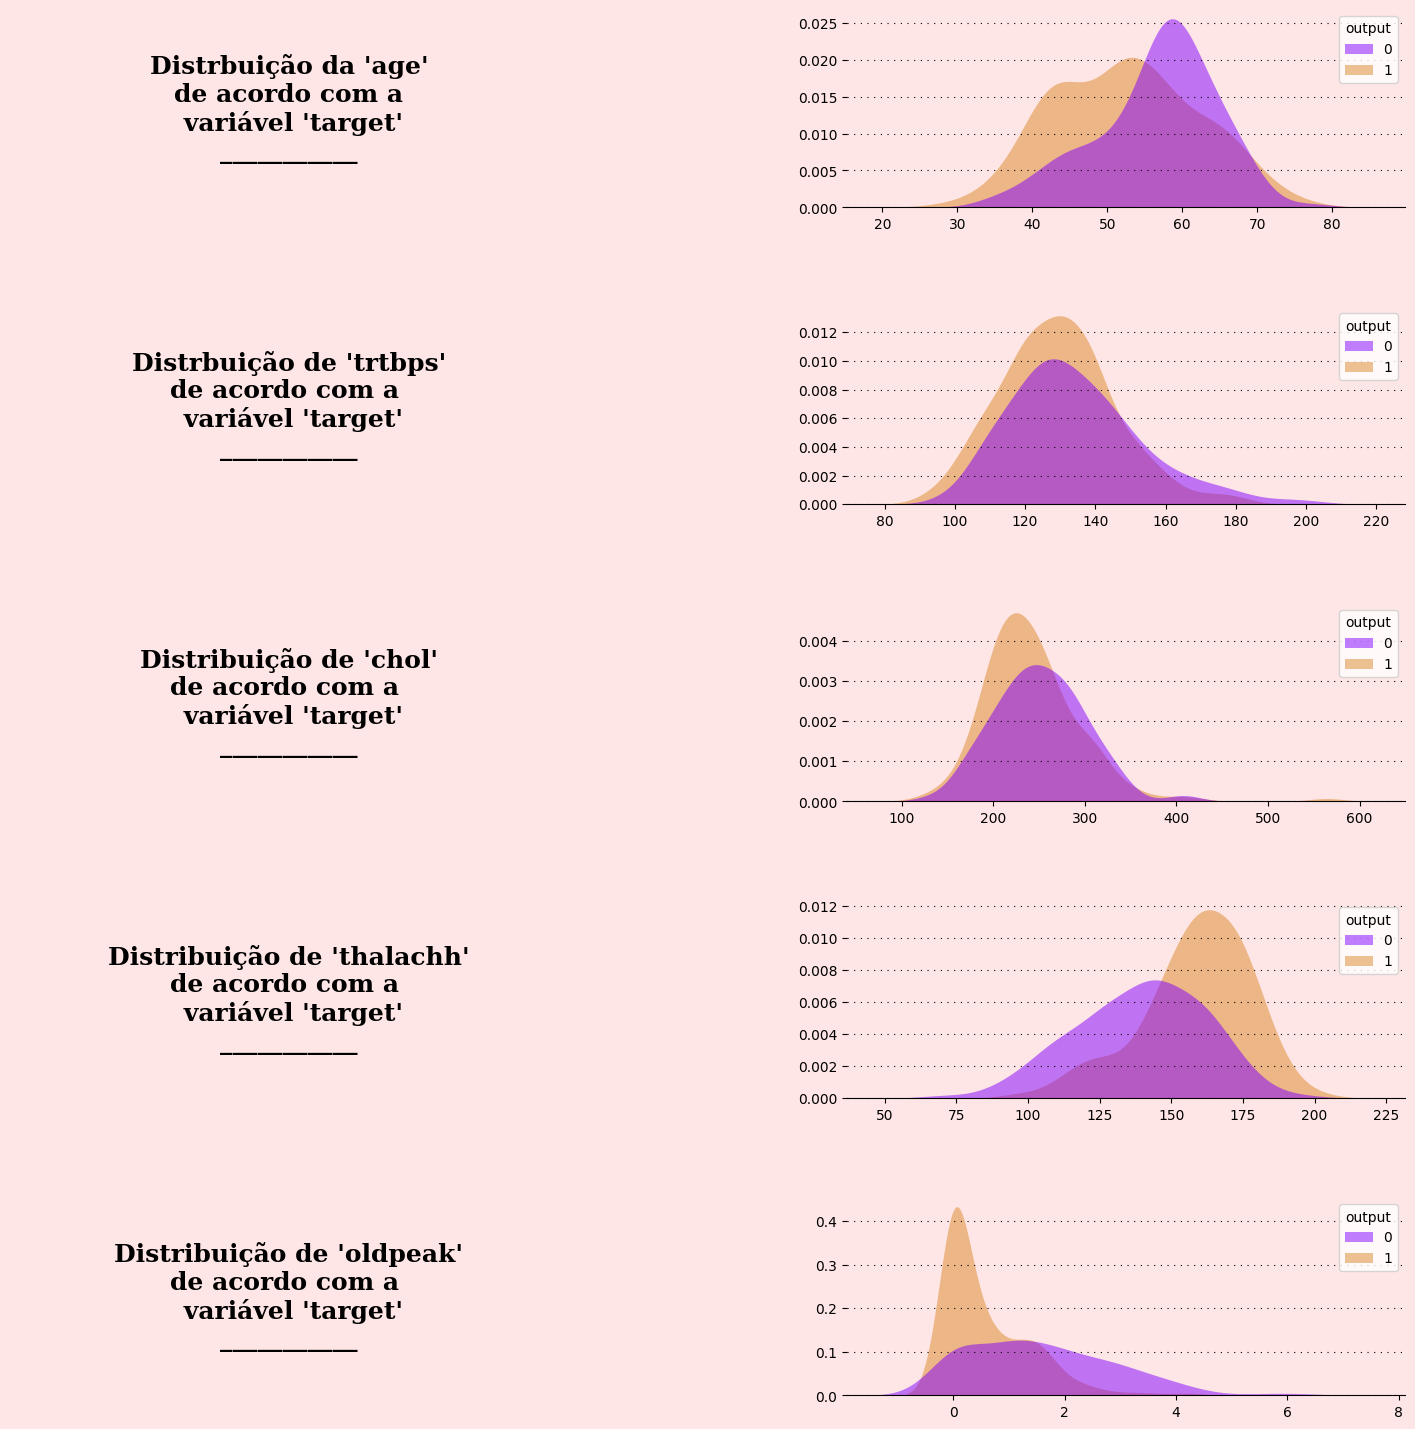

In [73]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age title
ax0.text(0.5,0.5,"Distrbuição da 'age'\nde acordo com a\n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# TrTbps title
ax2.text(0.5,0.5,"Distrbuição de 'trtbps'\nde acordo com a \n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Chol title
ax4.text(0.5,0.5,"Distribuição de 'chol'\nde acordo com a \n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thalachh title
ax6.text(0.5,0.5,"Distribuição de 'thalachh'\nde acordo com a \n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Oldpeak title
ax8.text(0.5,0.5,"Distribuição de 'oldpeak'\nde acordo com a \n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

### Outras relações relevantes

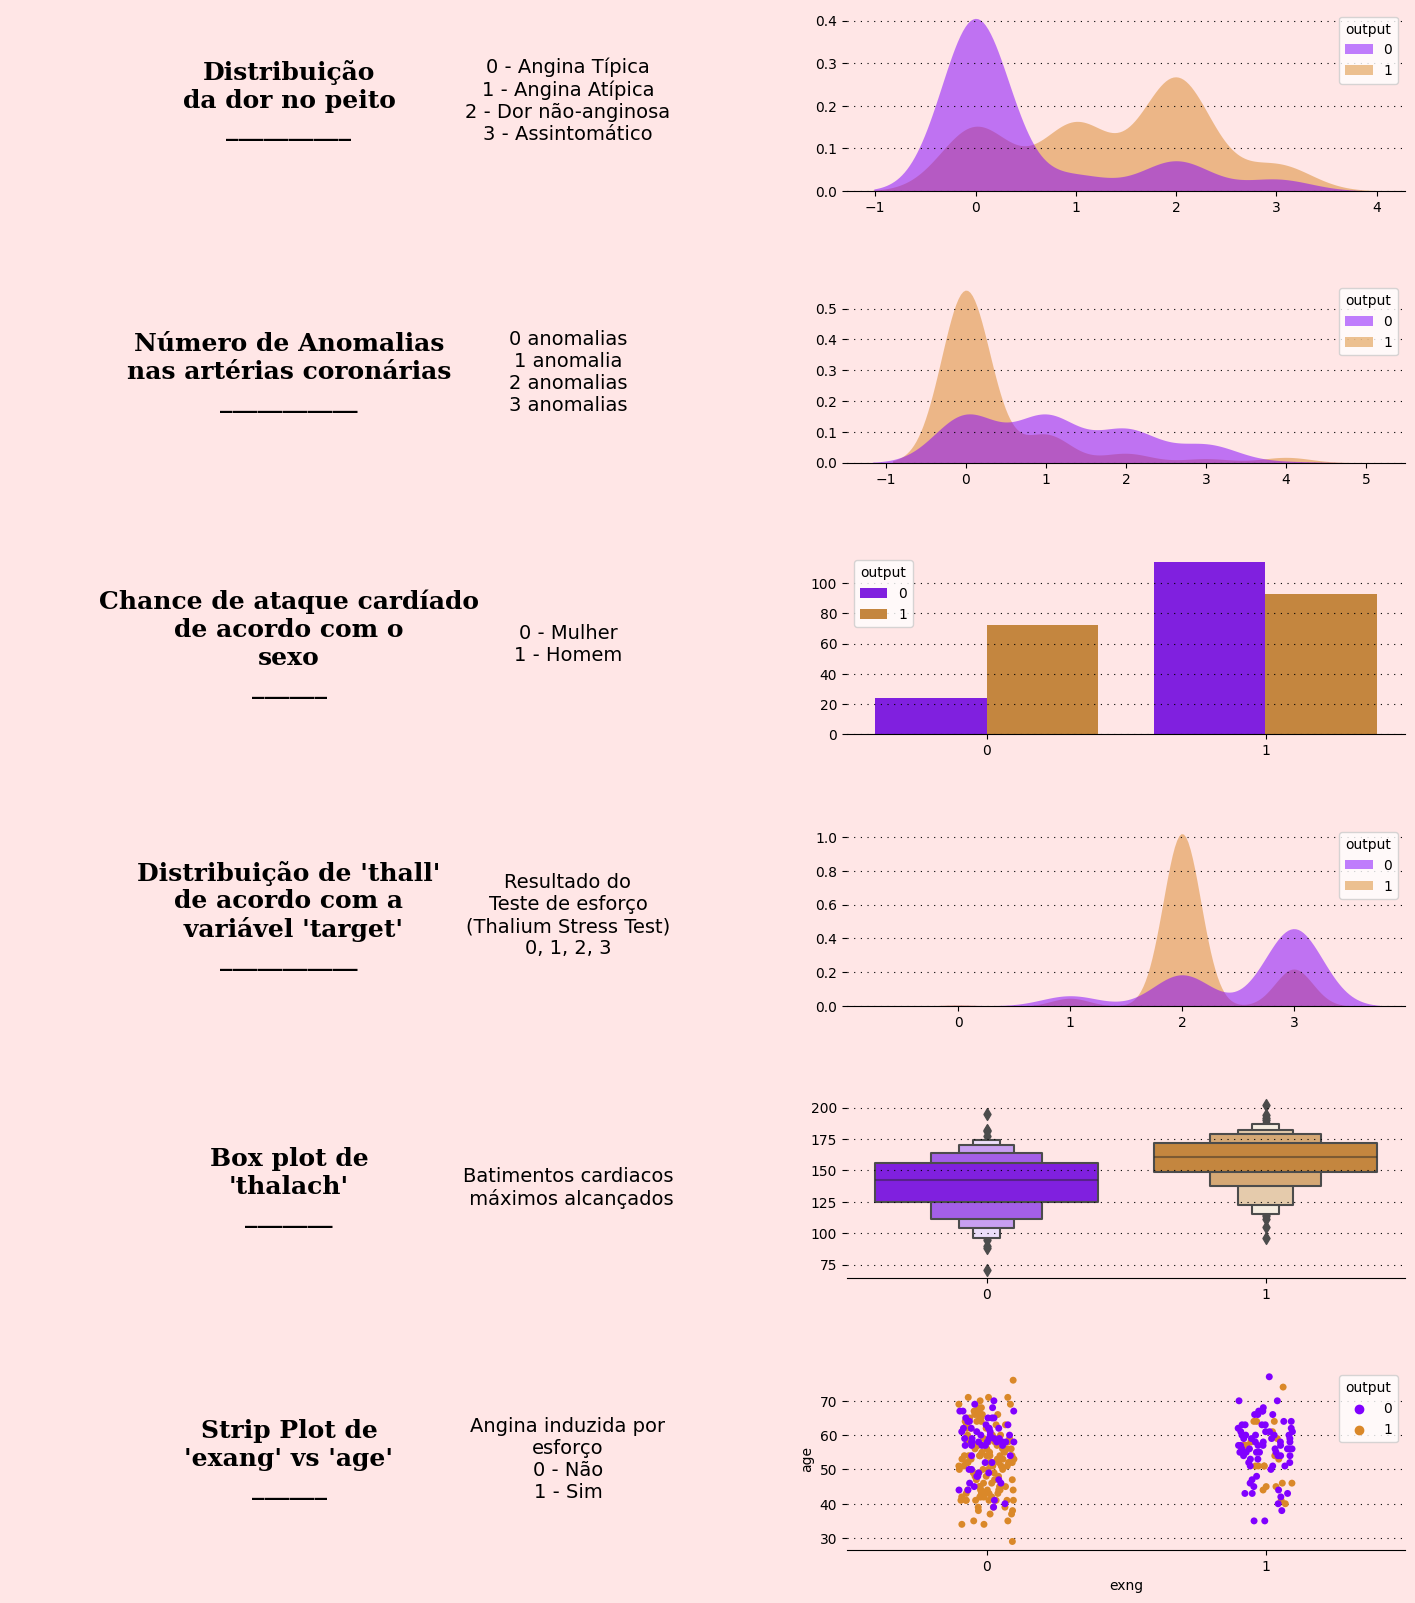

In [74]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#ffe6e6"
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Cp title
# 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
ax0.text(0.5,0.5,"Distribuição\nda dor no peito\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Angina Típica\n1 - Angina Atípica\n2 - Dor não-anginosa\n3 - Assintomático",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")

# Caa title
ax2.text(0.5,0.5,"Número de Anomalias\nnas artérias coronárias\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 anomalias\n1 anomalia\n2 anomalias\n3 anomalias",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")

# Sex title
ax4.text(0.5,0.5,"Chance de ataque cardíado\nde acordo com o\nsexo\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Mulher\n1 - Homem",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#8000ff","#da8829"], hue='output')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Thall title
ax6.text(0.5,0.5,"Distribuição de 'thall'\nde acordo com a\n variável 'target'\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Resultado do\nTeste de esforço\n(Thalium Stress Test)\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thalachh title
ax8.text(0.5,0.5,"Box plot de\n'thalach'\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Batimentos cardiacos\n máximos alcançados",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")



# Exng title
ax10.text(0.5,0.5,"Strip Plot de\n'exang' vs 'age'\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 18,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Angina induzida por\nesforço\n0 - Não\n1 - Sim",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 14
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output',palette=["#8000ff","#da8829"])
ax9.set_xlabel("")
ax9.set_ylabel("")

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

## **Pré-Processamento dos Dados**

### **Separação dos dados de treino e teste**

Após analisados estes dados, procedeu-se á separação dos dados em dois conjuntos, um de treino e outro de teste, com 80% e 20% dos dados, respetivamente.

In [75]:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('training data : ', X_train.shape, y_train.shape)
print('testing data : ', X_teste.shape, y_test.shape)

training data :  (242, 13) (242,)
testing data :  (61, 13) (61,)


## **Modelação dos dados**

### **Classificadores Lineares**

### **Support Vector Machines**

In [76]:
clf = SVC(kernel='linear', C=1, random_state=42).fit(X_train,y_train)

svc_pred = clf.predict(X_teste)

print("The test accuracy score of SVM is ", accuracy_score(y_test, svc_pred))

The test accuracy score of SVM is  0.8688524590163934


#### **Logisitic Regression**

Após estes processos, procedeu-se então ao treino do classificador, utilizando os valores pré deliniados e o respetivo "output".

In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_teste)

logreg_pred = np.argmax(y_pred_proba, axis=1)

print("A precisão do algoritmo Logistic Regression é: ", accuracy_score(y_test, logreg_pred))

A precisão do algoritmo Logistic Regression é:  0.8852459016393442


### **Modelos em Árvore**

### Decision Tree

In [78]:
dt = DecisionTreeClassifier(random_state = 42)

dt.fit(X_train, y_train)

dt_pred = dt.predict(X_teste)

print("A precisão do algoritmo Decision Tree é: ", accuracy_score(y_test, dt_pred))

A precisão do algoritmo Decision Tree é:  0.7540983606557377


### Random Forest

In [79]:
# instantiating the object
rf = RandomForestClassifier()

# fitting the model
rf.fit(X_train, y_train)

# calculating the predictions
rf_pred = dt.predict(X_teste)

# printing the test accuracy
print("A precisão do algoritmo Random Forest é: ", accuracy_score(y_test, rf_pred))

A precisão do algoritmo Random Forest é:  0.7540983606557377


Como podemos verificar a *Logistic Regression* apresenta uma melhor precisão em relação ao *SVC* e ainda em relação aos modelos em árvore, *Decision Tree* e *Random Forest*, que até apresentam precisões iguais.

### **Matriz de confusão**

<function matplotlib.pyplot.show(close=None, block=None)>

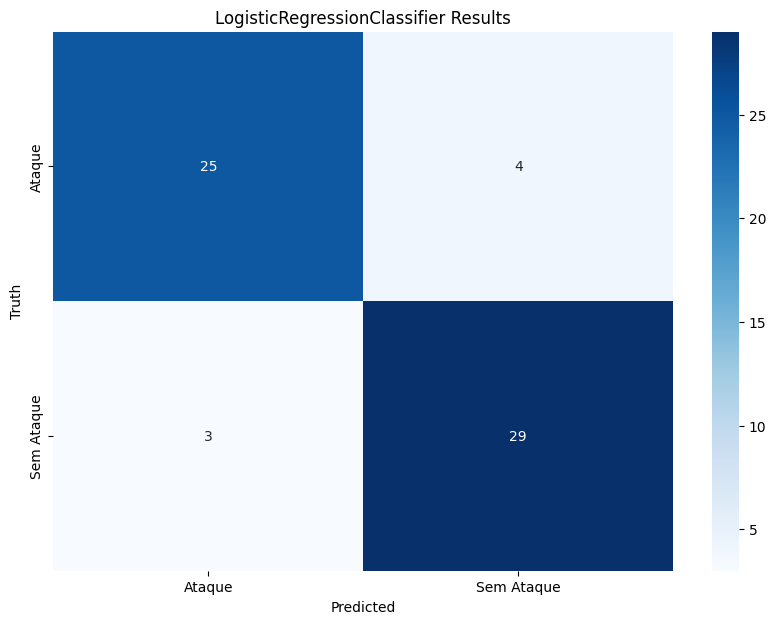

In [84]:
labels = ["Ataque", "Sem Ataque"]

def confusion_mat_graph(cm, title):
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot()
    ax.set_title(title)
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Truth")
    ax.xaxis.set_ticklabels(labels)
    ax.yaxis.set_ticklabels(labels)
train_pred = cross_val_predict(logreg, X, y, cv=2)
cm_teste = confusion_matrix(y_test, logreg_pred)
confusion_mat_graph(cm_teste, "LogisticRegressionClassifier Results")
plt.show